In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving resultats_presidentielles_2017.csv to resultats_presidentielles_2017.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['resultats_presidentielles_2017.csv']), encoding='ISO-8859-1')

In [0]:
data.head()

,Unnamed: 0,departement,nom_dept,abstentions_1,blancs_nuls_1,le_pen_1,macron_1,melenchon,fillon,hamon,dupont_aignan,poutou,asselineau,lassale,arthaud,cheminade,abstentions_2,blancs_nuls_2,le_pen_2,macron_2
0,1,1,Ain,0.195984,0.020631,0.195859,0.177193,0.124399,0.167846,0.040182,0.047580,0.007449,0.008685,0.008332,0.004429,0.001431,0.223897,0.090371,0.267871,0.417860
1,2,2,Aisne,0.213393,0.019771,0.273505,0.137538,0.130272,0.125000,0.032548,0.038991,0.008399,0.005778,0.006025,0.007353,0.001426,0.241477,0.084901,0.356419,0.317203
2,3,3,Allier,0.214096,0.026717,0.169636,0.180077,0.151123,0.143810,0.041888,0.038638,0.009159,0.005609,0.011779,0.006075,0.001392,0.233921,0.108092,0.237523,0.420465
3,4,4,Alpes-de-Haute-Provence,0.192158,0.020075,0.193264,0.157689,0.177345,0.145697,0.039367,0.038403,0.009307,0.007363,0.013596,0.004116,0.001620,0.231340,0.105908,0.275322,0.387430
4,5,5,Hautes-Alpes,0.189442,0.019644,0.168088,0.172400,0.171017,0.151446,0.046485,0.044929,0.009544,0.007124,0.014640,0.003740,0.001501,0.226541,0.103456,0.240391,0.429613


valeurs manquantes

In [0]:
data.isnull().sum()

Unnamed: 0       0
departement      0
nom_dept         0
abstentions_1    0
blancs_nuls_1    0
le_pen_1         0
macron_1         0
melenchon        0
fillon           0
hamon            0
dupont_aignan    0
poutou           0
asselineau       0
lassale          0
arthaud          0
cheminade        0
abstentions_2    0
blancs_nuls_2    0
le_pen_2         0
macron_2         0
dtype: int64

dimession de la base de données

In [0]:
data.shape

(107, 20)

Question 1: Analyse descriptive

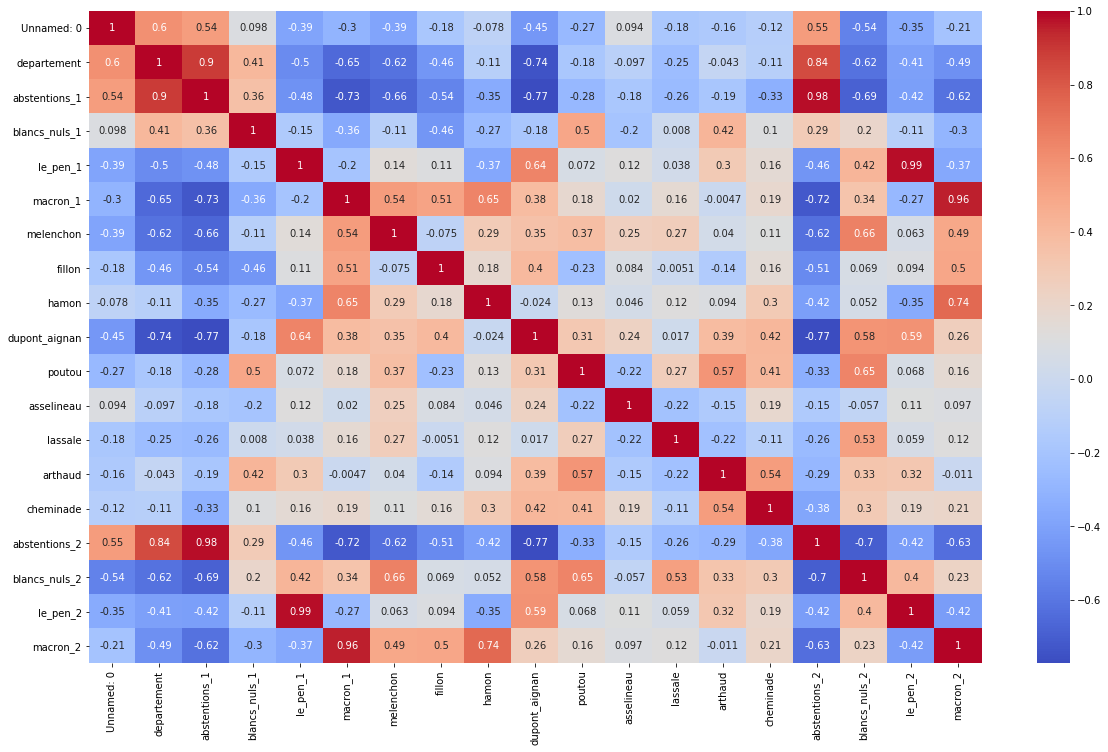

In [0]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

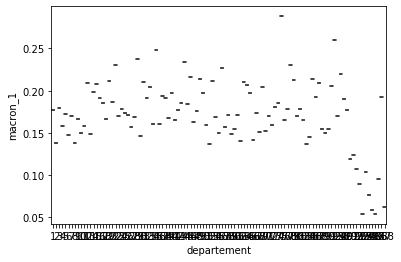

In [0]:
sns.boxplot(x="departement",y='macron_1',data=data)

selection des departement du metropole

In [0]:
data=data[-data["departement"].isin([ 99, 201, 202, 971, 972, 973, 974, 975, 976, 977,
       986, 987, 988])]

In [0]:
data.departement.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95])

question 3: régression univariée 

MCO

In [0]:
def MCO (X,y):
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary2())

In [0]:
data.departement.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  99, 201, 202, 971, 972, 973, 974, 975, 976, 977,
       986, 987, 988])

Estimation du Nombre de voix des abstentionnistes à l'aide des variables du 1er tour

In [0]:
X=data[[ 'abstentions_1',
       'blancs_nuls_1', 'le_pen_1', 'macron_1', 'melenchon', 'fillon', 'hamon',
       'dupont_aignan', 'poutou', 'asselineau', 'lassale', 'arthaud',
       'cheminade']]
y=data['macron_2']
MCO(X,y)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.988     
Dependent Variable: macron_2         AIC:                -663.6196 
Date:               2020-02-27 17:36 BIC:                -630.5568 
No. Observations:   94               Log-Likelihood:     344.81    
Df Model:           12               F-statistic:        663.1     
Df Residuals:       81               Prob (F-statistic): 1.68e-75  
R-squared:          0.990            Scale:              4.4261e-05
-------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
-------------------------------------------------------------------
abstentions_1      0.1455   0.0433   3.3584 0.0012   0.0593  0.2317
blancs_nuls_1     -0.5307   0.3670  -1.4460 0.1520  -1.2609  0.1995
le_pen_1          -0.3124   0.0278 -11.2390 0.0000  -0.3677 -0.2571
macron_1           1.3064   0.0594  22.0052 0.0000   1.1883  1.424

Estimation de lepen 2 à l'aide des variables du 1er tour

In [0]:
X=data[[ 'abstentions_1',
       'blancs_nuls_1', 'le_pen_1', 'macron_1', 'melenchon', 'fillon', 'hamon',
       'dupont_aignan', 'poutou', 'asselineau', 'lassale', 'arthaud',
       'cheminade']]
y=data['le_pen_2']
MCO(X,y)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993     
Dependent Variable: le_pen_2         AIC:                -738.1568 
Date:               2020-02-27 17:35 BIC:                -705.0940 
No. Observations:   94               Log-Likelihood:     382.08    
Df Model:           12               F-statistic:        1175.     
Df Residuals:       81               Prob (F-statistic): 1.75e-85  
R-squared:          0.994            Scale:              2.0028e-05
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
abstentions_1    0.0358    0.0291   1.2289  0.2227  -0.0222   0.0938
blancs_nuls_1    0.3557    0.2469   1.4407  0.1535  -0.1355   0.8469
le_pen_1         1.2202    0.0187  65.2509  0.0000   1.1830   1.2574
macron_1        -0.1159    0.0399  -2.9018  0.0048  -0.1953 

Estimation du taux d'abstention 2  à l'aide des variables du 1er tour

Suffrage de Lepen

In [0]:
X=data[[ 'abstentions_1',
       'blancs_nuls_1', 'le_pen_1', 'macron_1', 'melenchon', 'fillon', 'hamon',
       'dupont_aignan', 'poutou', 'asselineau', 'lassale', 'arthaud',
       'cheminade']]
y=data['abstentions_2']
MCO(X,y)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.915     
Dependent Variable: abstentions_2    AIC:                -682.3948 
Date:               2020-02-27 17:35 BIC:                -649.3319 
No. Observations:   94               Log-Likelihood:     354.20    
Df Model:           12               F-statistic:        84.10     
Df Residuals:       81               Prob (F-statistic): 1.67e-40  
R-squared:          0.926            Scale:              3.6247e-05
--------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
--------------------------------------------------------------------
abstentions_1   0.8717    0.0392  22.2346  0.0000    0.7937   0.9498
blancs_nuls_1  -1.0315    0.3321  -3.1059  0.0026   -1.6923  -0.3707
le_pen_1       -0.0014    0.0252  -0.0572  0.9545   -0.0515   0.0486
macron_1       -0.0622    0.0537  -1.1576  0.2504   -0.1691 


estmination blan_nul 2 à l'aide des variables du 1er tour

In [0]:
X=data[[ 'abstentions_1',
       'blancs_nuls_1', 'le_pen_1', 'macron_1', 'melenchon', 'fillon', 'hamon',
       'dupont_aignan', 'poutou', 'asselineau', 'lassale', 'arthaud',
       'cheminade']]
y=data['blancs_nuls_2']
MCO(X,y)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.841     
Dependent Variable: blancs_nuls_2    AIC:                -707.6888 
Date:               2020-02-27 17:35 BIC:                -674.6260 
No. Observations:   94               Log-Likelihood:     366.84    
Df Model:           12               F-statistic:        42.03     
Df Residuals:       81               Prob (F-statistic): 1.02e-29  
R-squared:          0.862            Scale:              2.7696e-05
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
abstentions_1   -0.0531    0.0343  -1.5485  0.1254  -0.1213   0.0151
blancs_nuls_1    2.2065    0.2903   7.6005  0.0000   1.6289   2.7842
le_pen_1         0.0937    0.0220   4.2613  0.0001   0.0500   0.1375
macron_1        -0.1284    0.0470  -2.7330  0.0077  -0.2218 